<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/esercizi_a_caso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:
# !pip install scipy
from scipy import stats as st
import pandas as pd
import numpy as np
from scipy.stats import norm,expon
import matplotlib.pyplot as plt
import seaborn as sns


In [201]:
s = 0.9555
mean, var, skew, kurt = st.lognorm.stats(s, moments='mvsk')

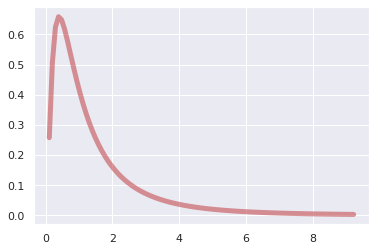

In [202]:
x=np.linspace(st.lognorm.ppf(0.01,s ),
              st.lognorm.ppf(0.99,s),100)
plt.plot(x,st.lognorm.pdf(x, s), 'r-',lw=5,alpha=0.6,label='lognorm pdf')

In [203]:
bau=[1,2,3,4,5,6]
iterator=iter(bau)
x=next(iterator)
print(x)

1


In [204]:
x=4
s='ciao' if x > 1 else 'arrivederci'
s

'ciao'

In [205]:
tup=(1,2,3,3,4,5,8,('stringaaa',))
a,s,d,f,g,h,j,k=tup
tup=list(tup)
tup[0]=33
tup
type(tup[7])
a

1

In [206]:
d=[3,5,7,9]
a,c,b,m=d

In [207]:
tuuple=(0,1,'ciao',[1,2,3,4,54])
liist=['list1','list2']
tuuple[::-1]
zipped=zip(tuuple,liist)
list(zipped)
tuuple[3][0]=12

In [208]:
#options price generator
# S_t=input() #stock price at time t
r=0.1 ##float(input('risk free rate: '))
S_0=50#float(input('prezzo dell\'azione al tempo 0: ')) #stock price at time 0
st_dev=0.3#float(input('deviazione standard: '))  #standard deviation
# mean=float(input('media: '))  # mean 
t=3/12#float(input('time between S_0 and S_t: ')) # time between S_0 and S_t
W_t= norm(loc=0,scale=np.sqrt(t)) # Brownian stochastic process ~(0,sqrt(t)) 
#funzionde per stimare il prezzo di un'azione 
def stima_del_prezzo_dell_azione_in_t(S_0,st_dev,r,t,W_t):
  S_t=S_0*np.exp((r-st_dev**2/2)*t+st_dev*W_t.rvs())
  return S_t

stima_del_prezzo_dell_azione_in_t(S_0,st_dev,r,t,W_t)
#funzione per stimare il valore atteso di un'azione asal tempo t
def expected_value_of_S_t(S_0,st_dev,r,t,W_t):
  EV=S_0*np.exp((r-st_dev**2/2)*t)

K=50 #int(input('stike price: ')) #stike price
stochastic_standard_norm=norm(loc=0,scale=1)

# funzione per calcolare d1 del modello black and scholes
def calculate_d_1(S_0,st_dev,r,t):
  global d_1
  d_1=(np.log(S_0/K)+(r+(st_dev**2/2))*t)/(st_dev*np.sqrt(t))
  return d_1
# funzione per calcolare d2 del modello black and scholes
def calculate_d_2(S_0,st_dev,r,t):
  global d_2
  d_2=(np.log(S_0/K)+(r-(st_dev**2/2))*t)/(st_dev*np.sqrt(t)) #d_2=d_1-st_dev*np.sqrt(t) 
  return d_2
# funzione per calcolare il prezzo della call
def call_option_price(d_1,d_2,S_0,st_dev,r,t):
  c=S_0*stochastic_standard_norm.cdf(d_1)-K*np.exp(-r*t)*stochastic_standard_norm.cdf(d_2)
  return c
#  funzione per calcolare il prezzo della put
def put_option_price(d_1,d_2,S_0,st_dev,r,t):
  p=K*np.exp(-r*t)*stochastic_standard_norm.cdf(-d_2)-S_0*stochastic_standard_norm.cdf(-d_1)
  return p

print(calculate_d_1(S_0,st_dev,r,t))
print(calculate_d_2(S_0,st_dev,r,t))
print(call_option_price(d_1,d_2,S_0,st_dev,r,t))
print(put_option_price(d_1,d_2,S_0,st_dev,r,t))

0.2416666666666667
0.09166666666666669
3.6104450660840186
2.3759406675006467


(array([0.01421102, 0.04547527, 0.21600755, 0.54570329, 0.74465762,
        0.72760439, 0.34959117, 0.15063685, 0.02557984, 0.02273764]),
 array([-1.71874312, -1.36690357, -1.01506403, -0.66322448, -0.31138493,
         0.04045461,  0.39229416,  0.74413371,  1.09597326,  1.4478128 ,
         1.79965235]),
 <a list of 1 Patch objects>)

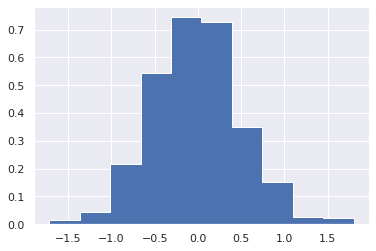

In [209]:
sample=[]
for i in range(1000):
  sample.append(W_t.rvs())
plt.hist(sample,density=True,histtype='stepfilled')  

In [210]:
stochastic_v=norm(loc=0,scale=1)
stochastic_v.cdf(-0.09)

0.4641436074148279

mean should be ~ 0: -0.05057151221286307 st. deviation should be ~1:  1.443008626393277


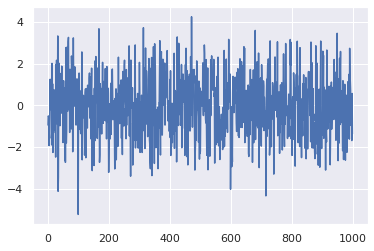

In [211]:
#random walk
stochastic_1=norm(loc=0,scale=1)
stochastic_2=norm(loc=0,scale=1)
v_a=[]
for i in range(1000):
  v_a.append(stochastic_1.rvs()-stochastic_2.rvs())
plt.plot(v_a)
print('mean should be ~ 0:',np.mean(v_a), 'st. deviation should be ~1: ',np.std(v_a))

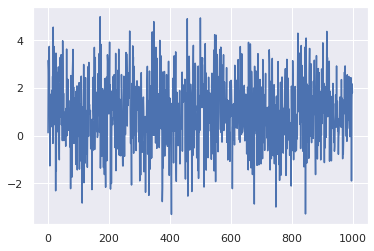

In [212]:
#random walk with drift
stochastic_1=norm(loc=0,scale=1)
stochastic_2=norm(loc=0,scale=1)
v_a=[]
for i in range(1000):
  v_a.append(stochastic_1.rvs()-stochastic_2.rvs()+1)
plt.plot(v_a)



(array([ 933.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9067.]),
 array([ 0.        ,  8.60707976, 17.21415953, 25.82123929, 34.42831906,
        43.03539882, 51.64247859, 60.24955835, 68.85663811, 77.46371788,
        86.07079764]),
 <a list of 10 Patch objects>)

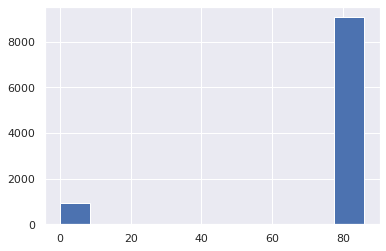

In [213]:
# credit risk
def funzione_indicatrice(momento_aleatorio_default,tempo):
  if momento_aleatorio_default < tempo:
    I=0
  else:
    I=1
  return I
T=1 #float(input('T: '))
t=0.5 #float(input('t: '))
my_lambda=0.20
FACE_VALUE=100
tau=expon(scale=1/my_lambda)
prezzo=[]
# plt.plot(tau.rvs(size=100))
for i in range(10000):
  prezzo_del_derivato_rischioso=FACE_VALUE*np.exp(-(r+my_lambda)*(T-t)) * funzione_indicatrice(tau.rvs(),t)
  prezzo.append(prezzo_del_derivato_rischioso)
plt.hist(prezzo)

Generator(PCG64)


(array([  3.,   2.,   2.,   8.,   6.,  18.,  24.,  33.,  38.,  57.,  78.,
         99., 143., 155., 199., 259., 298., 360., 410., 445., 495., 530.,
        538., 537., 610., 548., 529., 484., 447., 425., 387., 349., 310.,
        248., 218., 183., 134., 107.,  74.,  61.,  50.,  27.,  27.,  21.,
          7.,   9.,   3.,   1.,   2.,   2.]),
 array([-3.51494567, -3.37234842, -3.22975118, -3.08715394, -2.9445567 ,
        -2.80195945, -2.65936221, -2.51676497, -2.37416772, -2.23157048,
        -2.08897324, -1.946376  , -1.80377875, -1.66118151, -1.51858427,
        -1.37598702, -1.23338978, -1.09079254, -0.9481953 , -0.80559805,
        -0.66300081, -0.52040357, -0.37780632, -0.23520908, -0.09261184,
         0.0499854 ,  0.19258265,  0.33517989,  0.47777713,  0.62037438,
         0.76297162,  0.90556886,  1.0481661 ,  1.19076335,  1.33336059,
         1.47595783,  1.61855508,  1.76115232,  1.90374956,  2.0463468 ,
         2.18894405,  2.33154129,  2.47413853,  2.61673578,  2.75933302,
 

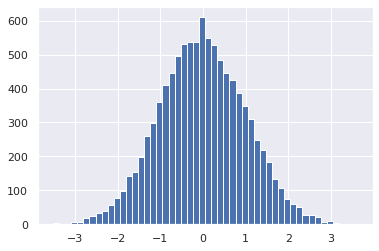

In [214]:
#random number genarator
rng= np.random.default_rng(12345)
print(rng)

rng_1=np.random.default_rng()
x=[]
for i in range(10000):
  x.append(rng_1.standard_normal())
stoch=np.array(x)
plt.hist(stoch,bins=50)

In [215]:

# a,b,c,d,e,f=st.alpha() , st.gamma(),st.expon(),st.lognorm(),st.uniform(),st.t()
l={}
lista_di_distribuzioni=[st.alpha(2) , st.gamma(2),st.expon(),st.lognorm(1),st.uniform(),st.t(10)]
def dammi_un_campione_di_dati(n_dati):
  for i,b in enumerate(lista_di_distribuzioni):
    l[i]=b.rvs(size=n_dati)
  df=pd.DataFrame.from_dict(l)
  return df

dammi_un_campione_di_dati(1000)

sns.set()

sns.distplot(df.iloc[:,0],bins=50,ax=axes[0:0])
sns.distplot(df.iloc[:,1],bins=50,ax=axes[0:1])
sns.distplot(df.iloc[:,2],bins=50,ax=axes[0:2])
sns.distplot(df.iloc[:,3],bins=50,ax=axes[1:0])
sns.distplot(df.iloc[:,4],bins=50,ax=axes[1:1])
sns.distplot(df.iloc[:,5],bins=50,ax=axes[1:2])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: ignored

In [ ]:
c=st.uniform()
d=c.rvs(size=100) 
bi={}
bi['d']=d
plt.hist(d,100)

In [ ]:

lista=[st.norm()]
lista[0].rvs()